In [ ]:
import sqlite3
from sqlite3 import Error


def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by the db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)

    return conn


def select_all_tasks(conn):
    """
    Query all rows in the tasks table
    :param conn: the Connection object
    :return:
    """
    cur = conn.cursor()
    cur.execute("SELECT  airline_sentiment,text FROM tweets")

    rows = cur.fetchall()
    for row in rows:
        #print(row)


def main():
    database = 'database.sqlite'

    # create a database connection
    conn = create_connection(database)
    with conn:
        
        

        print("Query dataset")
        select_all_tasks(conn)


if __name__ == '__main__':
    main()

In [1]:
import sqlite3
from sqlite3 import Error
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')



In [2]:
import sqlite3
import pandas   as pd  
dat = sqlite3.connect('database.sqlite') #connected to database

query = dat.execute("SELECT * From tweets")

cols = [column[0] for column in query.description]
results= pd.DataFrame.from_records(data = query.fetchall(), columns = cols)
results.shape

(14485, 15)

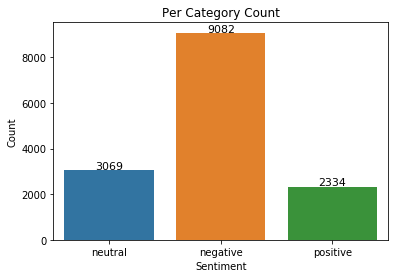

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

ax = sns.countplot(x='airline_sentiment',data=results)
plt.title('Per Category Count')
plt.xlabel('Sentiment')
plt.ylabel('Count')
for p in ax.patches:
             ax.annotate( p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 4),
                 textcoords='offset points')



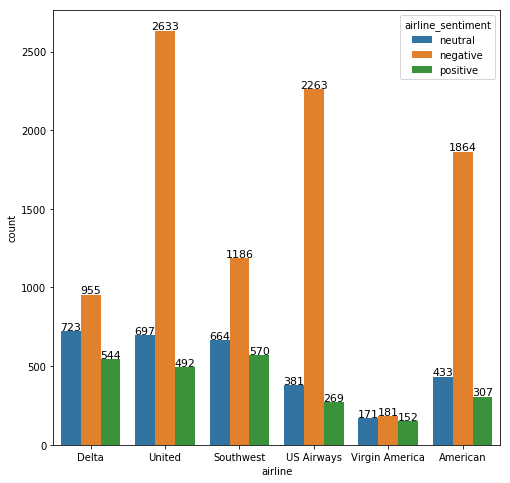

In [4]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='airline',hue='airline_sentiment',data=results)
for p in ax.patches:
             ax.annotate( p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 4),
                 textcoords='offset points')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

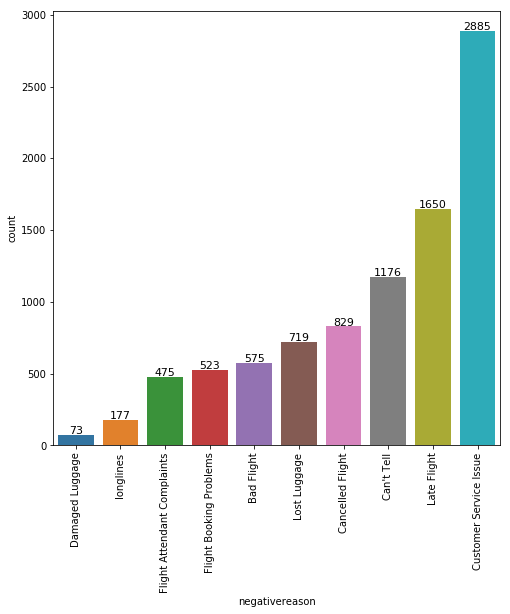

In [5]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='negativereason',data=results,order=results['negativereason'].value_counts().sort_values().index[:-1])
for p in ax.patches:
             ax.annotate( p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 4),
                 textcoords='offset points')
plt.xticks(rotation=90)

In [6]:
def clean_text(dataframe1):
    dataframe=dataframe1[['text']]
    # drop nans
    dataframe=dataframe.dropna()
    # convert review into lower case
    dataframe['text']=dataframe['text'].apply(lambda row : row.lower())
    # remove numbers
    dataframe['text']=dataframe['text'].apply(lambda row : re.sub('\d+','',row))
    # remove tweet account name
    dataframe['text']=dataframe['text'].apply(lambda row:re.sub(r'@\w+\'?\w+ ', '',row))   #row:re.sub(r'@\w+', '',row
    # remove website urls
    dataframe['text']=dataframe['text'].apply(lambda row:re.sub(r'http\S+', '',row))
    # rwmove special characters
    dataframe['text']=dataframe['text'].apply(lambda row:re.sub(r"[^A-Za-z0-9']+", ' ',row))
    # remove white spaces
    dataframe['text']=dataframe['text'].apply(lambda row:re.sub(r'\s+', ' ',row))
    
    return dataframe

results['Cleaned Tweets'] = clean_text(results)

(-0.5, 1599.5, 799.5, -0.5)

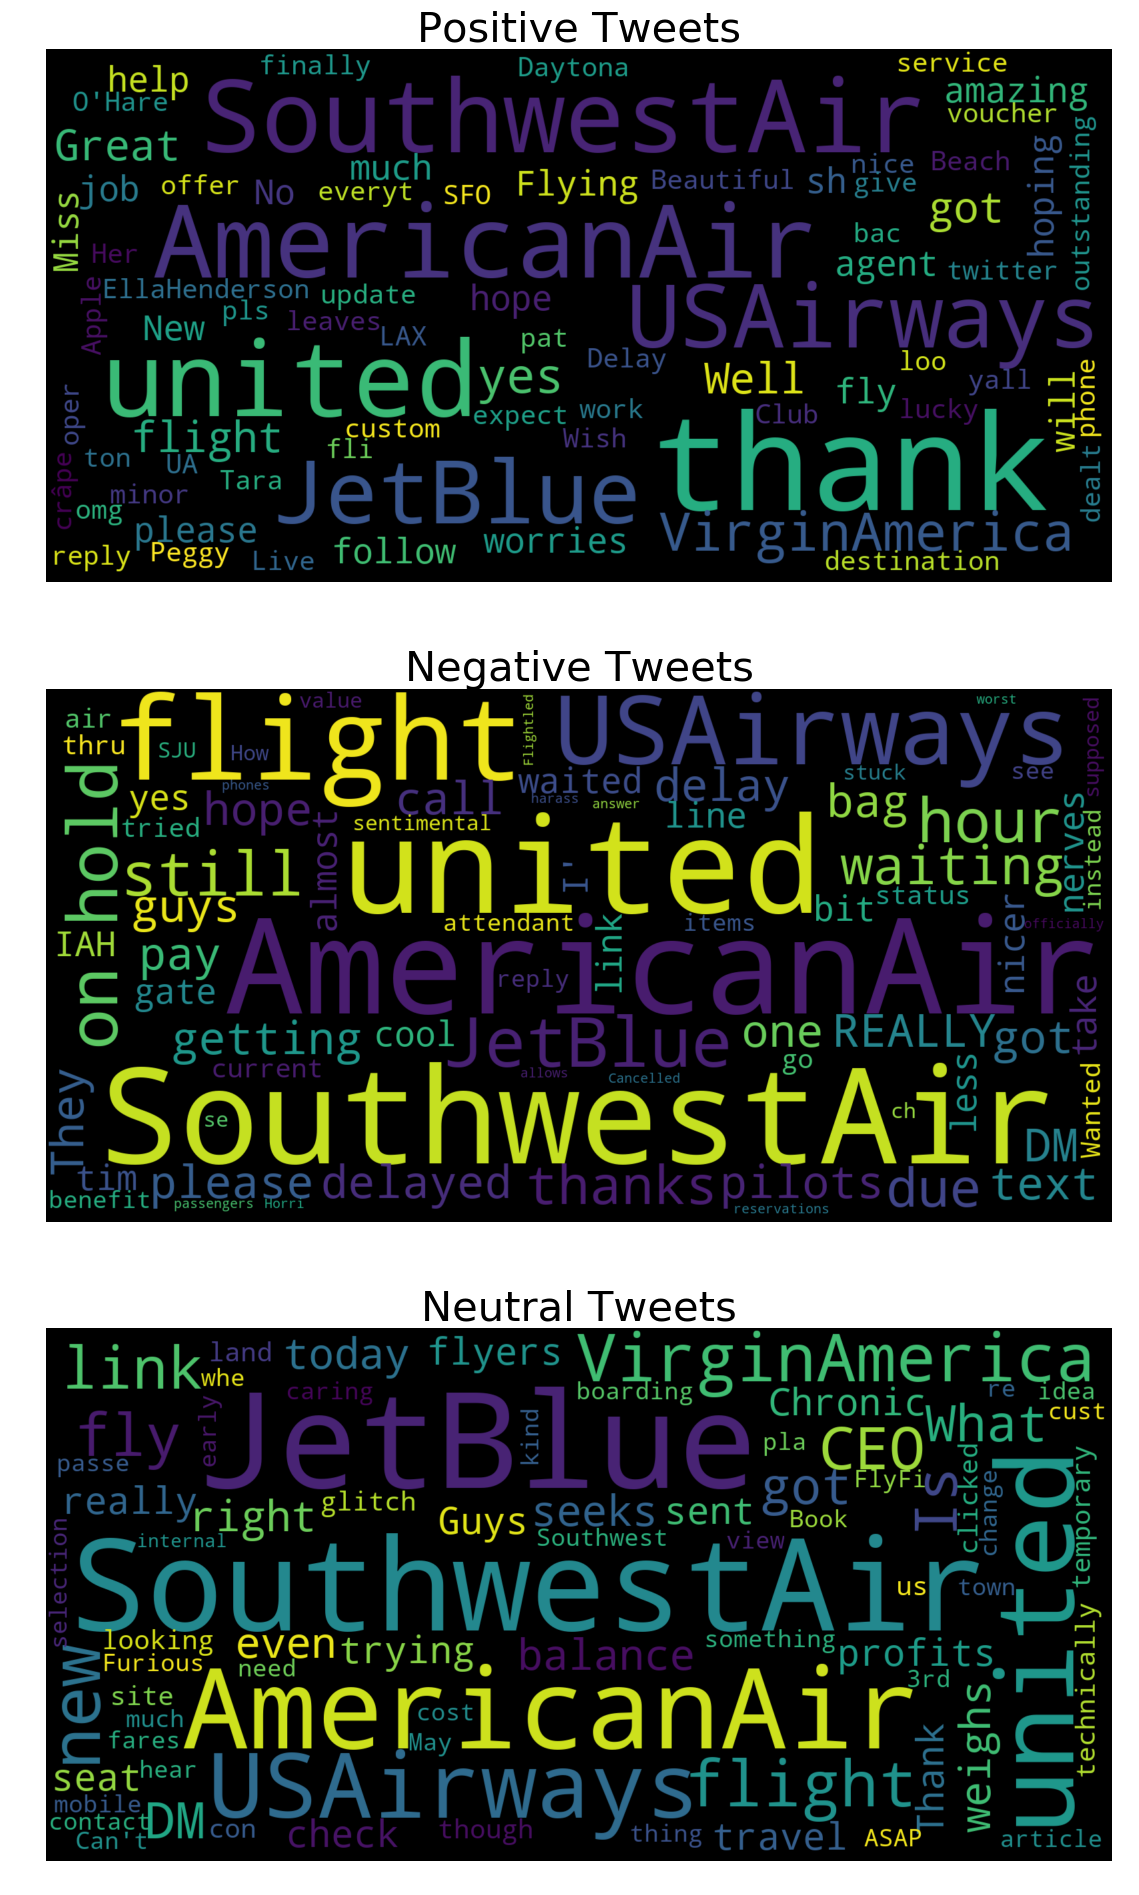

In [8]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
stopwords = set(STOPWORDS)

positive_tweets = results[results['airline_sentiment']=='positive']
negative_tweets = results[results['airline_sentiment']=='negative']
neutral_tweets = results[results['airline_sentiment']=='neutral']

fig, ax = plt.subplots(3, 1, figsize  = (24,24),dpi=100)
wordcloud_positive = WordCloud(max_font_size=50, stopwords=stopwords, max_words=75, background_color="black",scale=4).generate(str(positive_tweets['text']))
wordcloud_negative = WordCloud(max_font_size=50, stopwords=stopwords, max_words=75, background_color="black",scale=4).generate(str(negative_tweets['text']))
wordcloud_neutral = WordCloud(max_font_size=50, stopwords=stopwords, max_words=75, background_color="black",scale=4).generate(str(neutral_tweets['text']))


ax[0].imshow(wordcloud_positive, interpolation='bilinear')
ax[0].set_title('Positive Tweets', fontsize=30)
ax[0].axis('off')

ax[1].imshow(wordcloud_negative, interpolation='bilinear')
ax[1].set_title('Negative Tweets', fontsize=30)
ax[1].axis('off')

ax[2].imshow(wordcloud_neutral, interpolation='bilinear')
ax[2].set_title('Neutral Tweets', fontsize=30)
ax[2].axis('off')

#plt.tight_layout(pad=0)

In [9]:
def lemmatize_sentence(corpus):
    dataframe = results['Cleaned Tweets']
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word) for word in corpus.split()])
    
    #return dataframe['Lemmatize']


results['Lemmatize'] = results['Cleaned Tweets'].apply(lambda x: lemmatize_sentence(x))

### Need to split dataset into test, train,val before implementing TF-IDF

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X = results1.drop('airline_sentiment',axis='columns')
y = results1['airline_sentiment']

#saving x_test for testing of model.
results, x_test, results_y, y_test = train_test_split(X,y, test_size=0.15,random_state=42,stratify=y)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer  
stop_words=['in','of','at','a','the','i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you','they',
 'them', 'their', 'theirs', 'themselves']

tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words=stop_words,ngram_range=(1, 2))  
X = tfidfconverter.fit_transform(results['Cleaned Tweets']).toarray()

In [ ]:
tfidfconverter.get_feature_names()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
results['score_value'] = results['airline_sentiment'].apply(
      lambda x: 2 if x == 'positive' else (0 if x == 'negative' else 1))

#X_train, X_val, y_train, y_val = train_test_split(results, target, train_size = 0.75)